# Data Preprocessing visualization

## Import modules and load datasets

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': 
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data_path = './esg_merge.csv'   # 패스 지정

df = pd.read_csv(data_path)

# 데이터 프레임 정리하기
# Unnamed: 0 열은 주로 CSV 파일을 데이터프레임으로 읽을 때 파일에 인덱스 정보가 없는 경우 자동으로 인덱스 열을 생성한 것
df['company_id'] = df['Unnamed: 0']
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df = df.replace('-', np.nan)  # -는 결측치로, nan으로 처리.

df.head()

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,한국ESG연구소,Moody's,MSCI,S&P,연도,company_id
0,AJ네트웍스,B,D,B,B,NaN,NaN,NaN,NaN,2020,0
1,AJ네트웍스,B,D,B,B,NaN,NaN,NaN,NaN,2021,0
2,AJ네트웍스,B+,C,B+,B+,NaN,NaN,NaN,NaN,2022,0
3,AJ네트웍스,B+,C,B+,B+,NaN,NaN,NaN,NaN,2023,0
4,AK홀딩스,B+,C,B+,B+,NaN,NaN,NaN,NaN,2020,1


## preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   회사명         3176 non-null   object
 1   KCGS_종합등급   3088 non-null   object
 2   KCGS_환경     3088 non-null   object
 3   KCGS_사회     3088 non-null   object
 4   KCGS_지배구조   3088 non-null   object
 5   한국ESG연구소    623 non-null    object
 6   Moody's     231 non-null    object
 7   MSCI        458 non-null    object
 8   S&P         1098 non-null   object
 9   연도          3176 non-null   int64 
 10  company_id  3176 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 273.1+ KB


각 열(column)별로 결측치(NaN 값)의 비율을 계산한다.<br>(각 열별로 True의 개수, 즉 결측치의 개수 계산 / 전체 행의 개수를 계산한다.)

In [6]:
df.isna().sum() / len(df)

회사명           0.000000
KCGS_종합등급     0.027708
KCGS_환경       0.027708
KCGS_사회       0.027708
KCGS_지배구조     0.027708
한국ESG연구소      0.803841
Moody's       0.927267
MSCI          0.855793
S&P           0.654282
연도            0.000000
company_id    0.000000
dtype: float64

KCGS_종합등급 ~ KCGS_지배구조 4개의 column에 모두 결측치가 존재하는 행 88개가 있다. 이는 행을 drop하는 것이 좋다.

In [7]:
drop_rows = df[df['KCGS_종합등급'].isna()]

display(drop_rows.isna().sum())

df = df.drop(drop_rows.index, axis=0) # 행 삭제

df.info()

회사명            0
KCGS_종합등급     88
KCGS_환경       88
KCGS_사회       88
KCGS_지배구조     88
한국ESG연구소      59
Moody's       88
MSCI          68
S&P           53
연도             0
company_id     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 3175
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   회사명         3088 non-null   object
 1   KCGS_종합등급   3088 non-null   object
 2   KCGS_환경     3088 non-null   object
 3   KCGS_사회     3088 non-null   object
 4   KCGS_지배구조   3088 non-null   object
 5   한국ESG연구소    594 non-null    object
 6   Moody's     231 non-null    object
 7   MSCI        438 non-null    object
 8   S&P         1063 non-null   object
 9   연도          3088 non-null   int64 
 10  company_id  3088 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 289.5+ KB


In [8]:
drop_columns = ["한국ESG연구소", "Moody's", "MSCI", "S&P"]
final_df = df.drop(drop_columns, axis=1)

drop_columns는 결측치 비율이 너무 높아 해당 column을 제거하는 것이 타당하다. 우선 EDA는 제거할 column까지 하겠지만, 실제로는 drop하는 것이 좋다.

In [9]:
categorical_variables = ['KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조']

In [10]:
final_df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id
0,AJ네트웍스,B,D,B,B,2020,0
1,AJ네트웍스,B,D,B,B,2021,0
2,AJ네트웍스,B+,C,B+,B+,2022,0
3,AJ네트웍스,B+,C,B+,B+,2023,0
4,AK홀딩스,B+,C,B+,B+,2020,1
...,...,...,...,...,...,...,...
3171,흥국화재,B+,C,B+,B+,2023,792
3172,흥아해운,D,D,C,D,2020,793
3173,흥아해운,D,D,C,D,2021,793
3174,흥아해운,C,C,B,C,2022,793


In [11]:
# 정수 인코딩
rating_mapping = {'A': 4, 'A+': 4.5, 'B': 3, 'B+': 3.5, 'C': 2, 'D': 1}

for col in categorical_variables:
    final_df[f"{col}_encoded"] = final_df[col].map(rating_mapping)
    # final_df DataFrame에 새로운 열 추가 (원래 열 이름 col에 _encoded 접미사 붙이기)
    # 기존의 범주형 열을 점수로 매핑하여 새로운 열에 저장

In [12]:
final_df.head()

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5


## EDA

In [13]:
categorical_variables = ['KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조', '한국ESG연구소', "MSCI"]
numerical_variables = ["Moody's", "S&P"]

In [14]:
def plotting_barh(df, col):
    vc = df[col].value_counts().head(10)   # 열의 값들을 세어서 많은 상위 10개의 값을 vc에 저장
    fig, ax = plt.subplots()
    
    ax.set_title(f"{col} value count")

    ax.barh(vc.index, vc, height=0.6)
    # 가로 막대 그래프
    for index, v in enumerate(vc):
        ax.text(v, index-0.05, str(v), ha='left')

    plt.show()

In [15]:
def plotting_violin_box(df, col):
    data = df.loc[df[col].notna(), col].astype(float)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        
    ax[0].set_title(f"{col} violinplot + boxplot")
    ax[0].violinplot(data)    # violin plot 그리기
    ax[0].boxplot(data)     # barplot 그리기
    
    ax[1].set_title(f"{col} hist + kde")
    sns.histplot(data, ax=ax[1], kde=True)
    
    plt.show();

In [16]:
def plotting_by_year(df, col):
    
    group = df.groupby(['연도', col]).count()['company_id']
    # 연도와 열의 조합별 데이터 개수
    ax = group.unstack().plot(kind='barh', figsize=(12, 8))
    
    ax.set_title(f"연도별 {col}의 분포")
    
    plt.show();

### 범주형 변수 시각화 (plotting categorical variable)

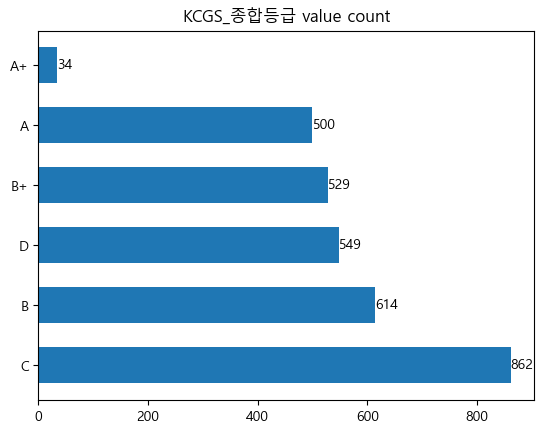

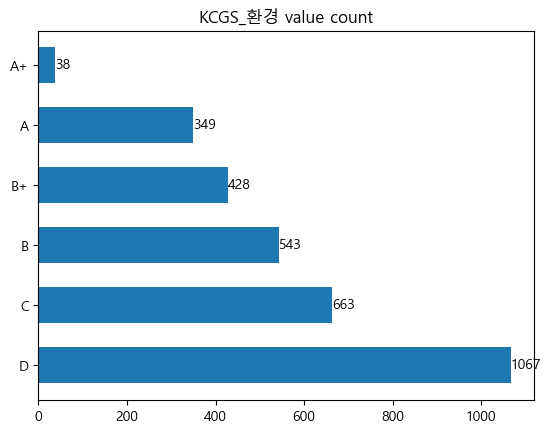

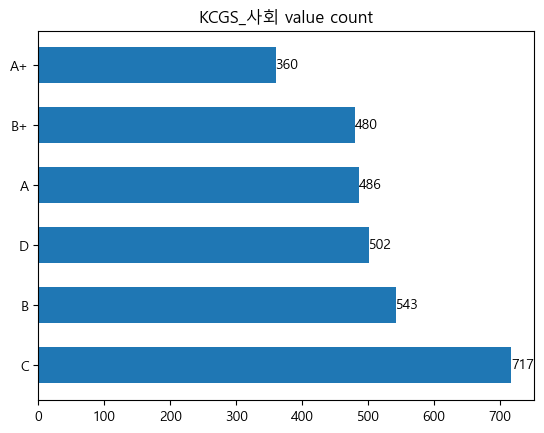

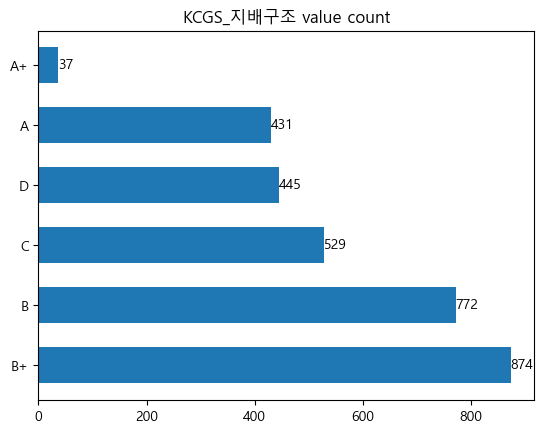

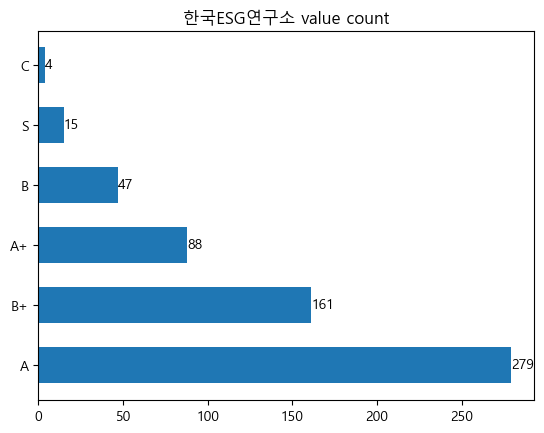

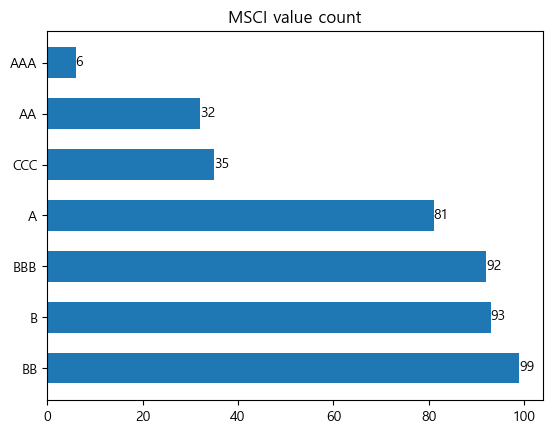

In [17]:
for col in categorical_variables:
    plotting_barh(df, col)

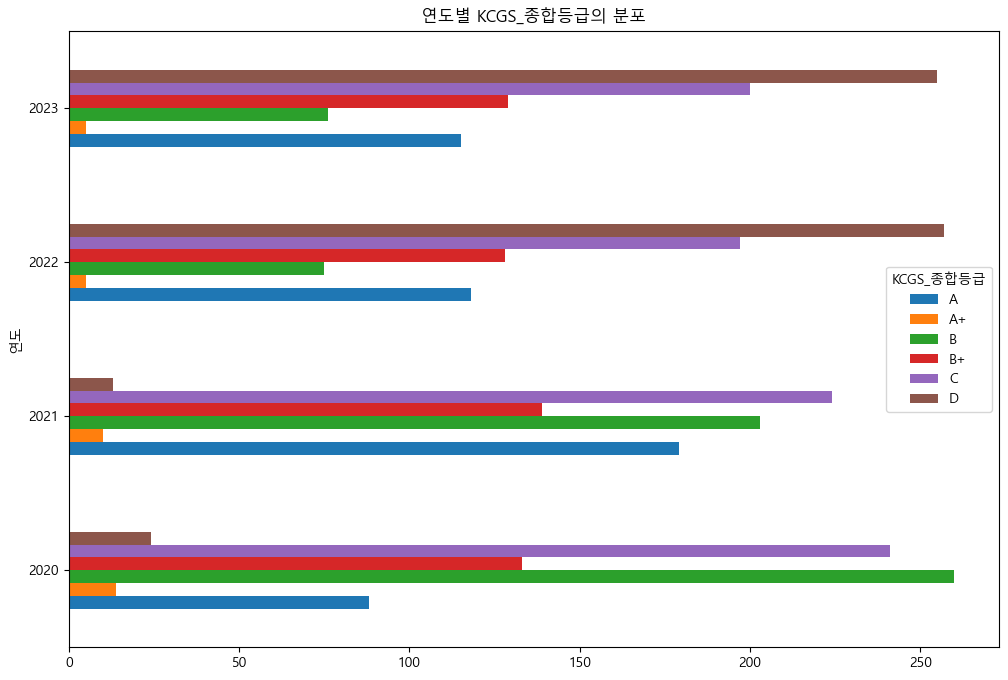

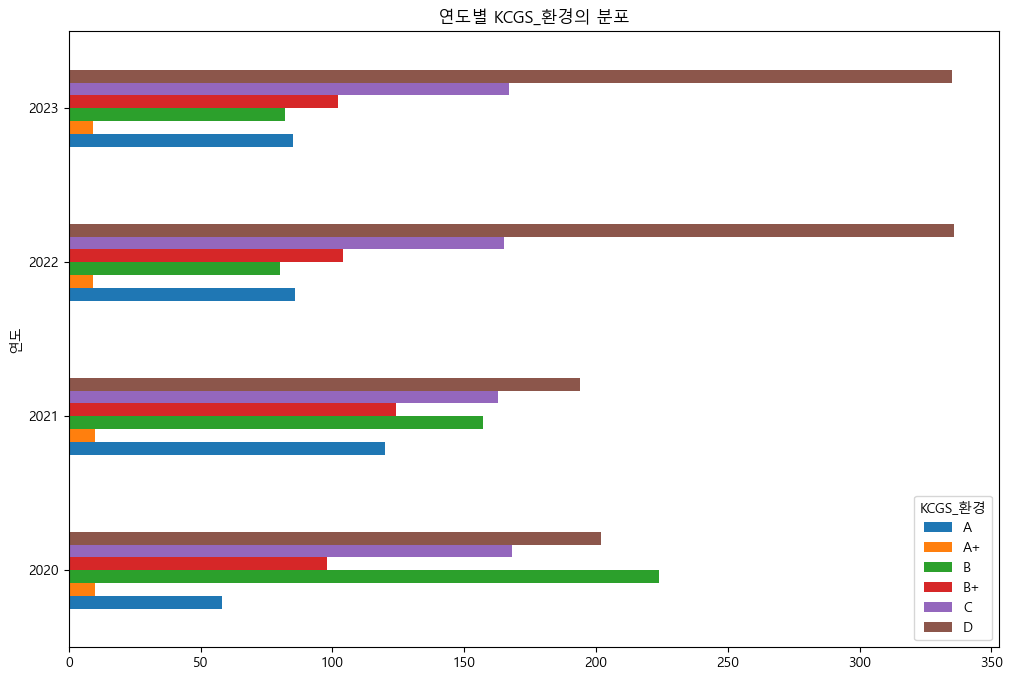

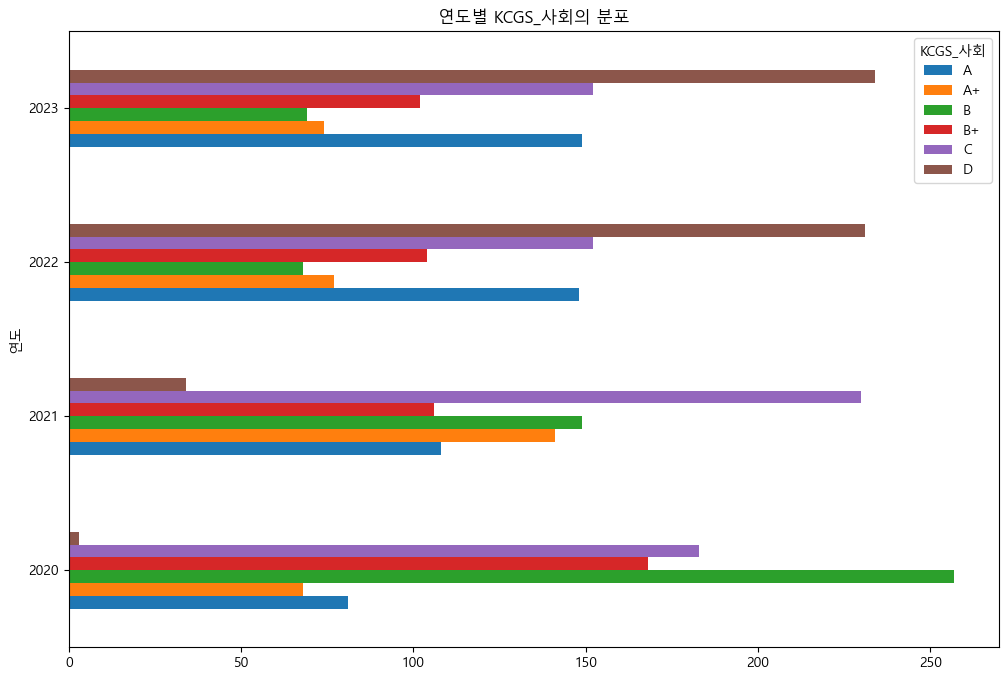

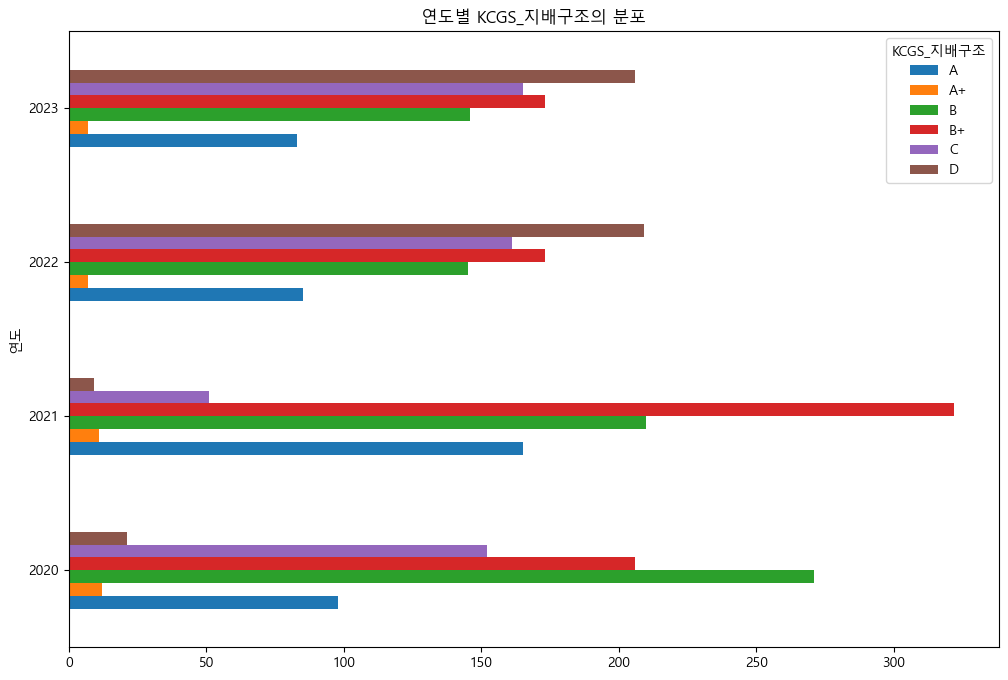

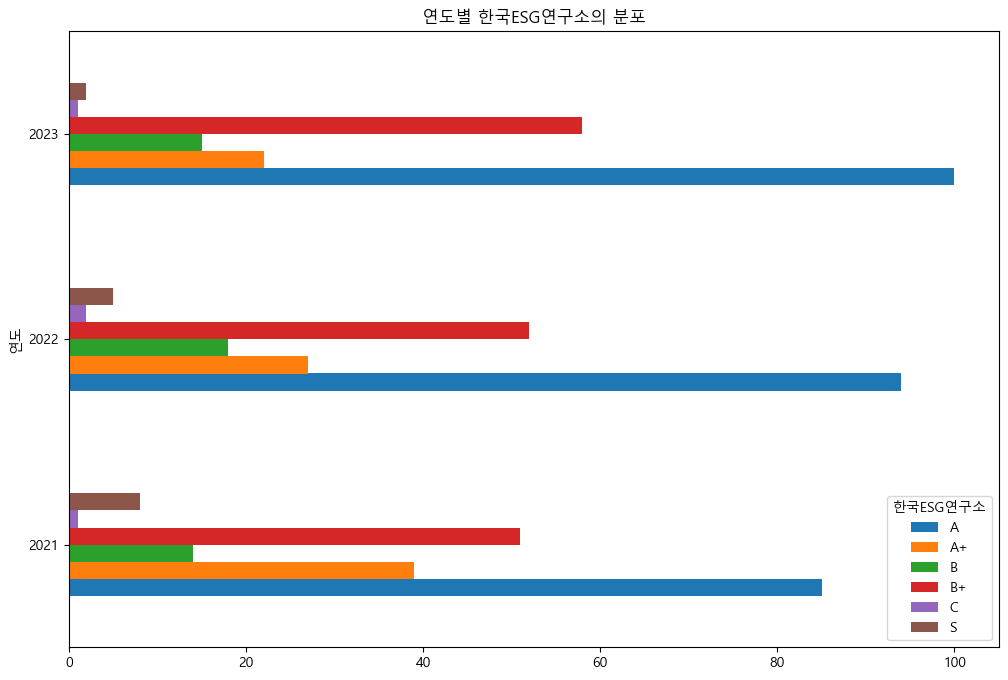

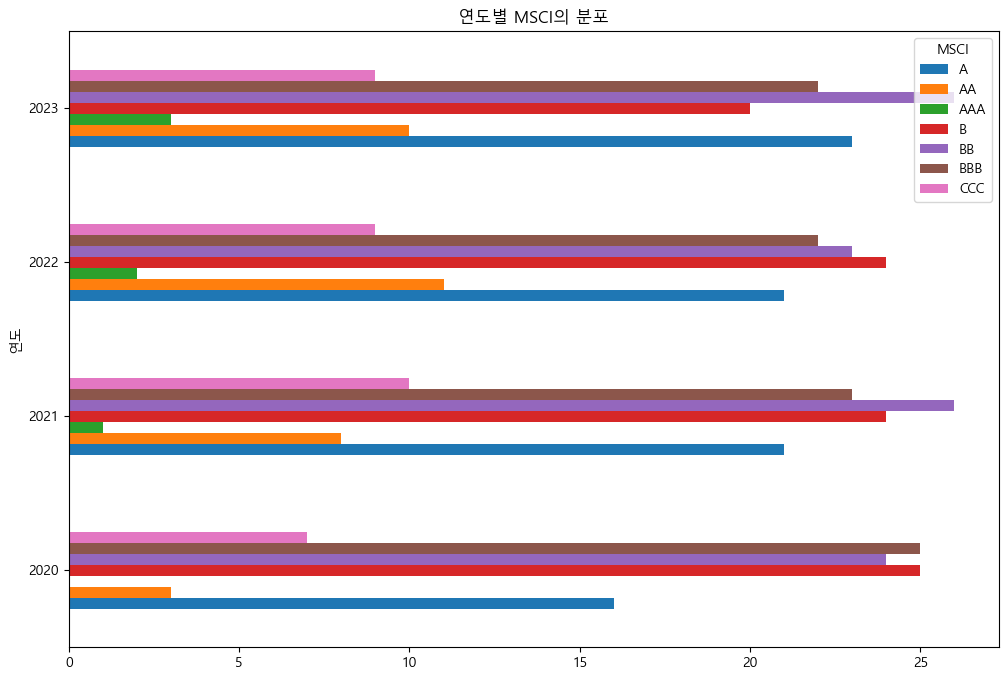

In [18]:
for col in categorical_variables:
    plotting_by_year(df, col)

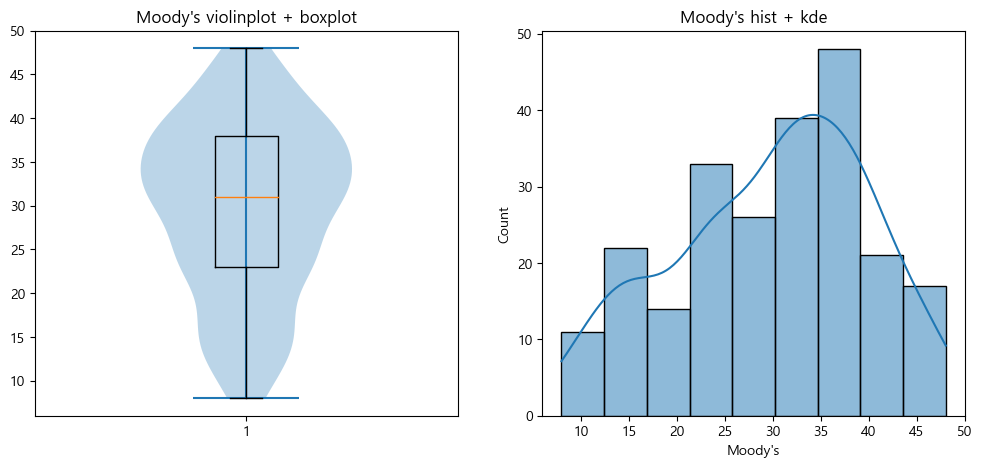

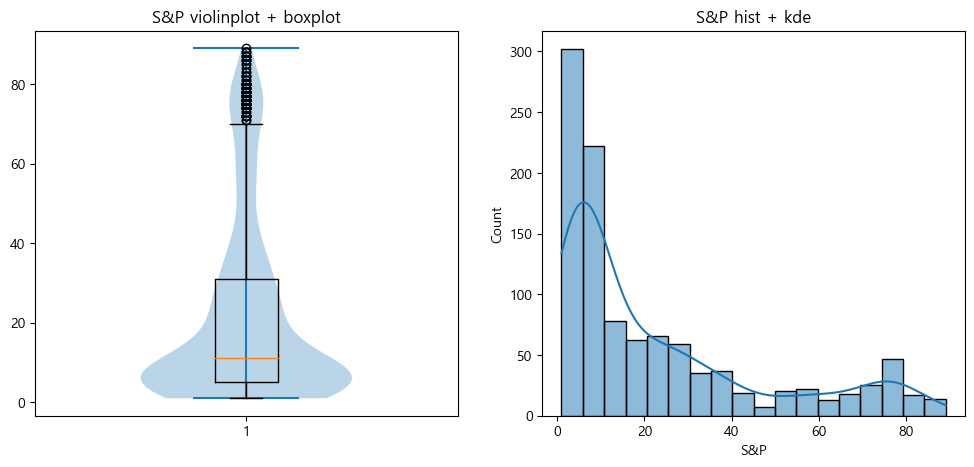

In [19]:
for col in numerical_variables:
    plotting_violin_box(df, col)

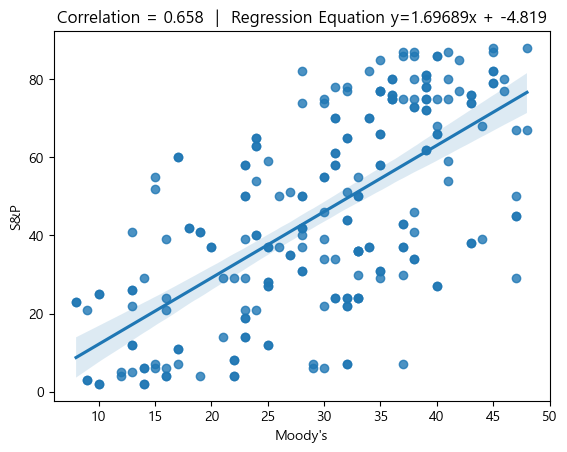

In [20]:
# 두 개의 숫자형 변수 선택
v1 = numerical_variables[0]
v2 = numerical_variables[1]

# 해당 변수 열을 실수(float) 형으로 변환
df[v1] = df[v1].astype(float)
df[v2] = df[v2].astype(float)

# 두 변수 열에 결측치가 없는 행만 포함하는 임시 데이터프레임(temp_df)을 생성
temp_df = df[[v1, v2]].dropna()

fig, ax = plt.subplots()

# 두 변수 간의 선형 관계 정도 (상관계수는 -1과 1 사이의 값)
corr = np.corrcoef(temp_df[v1], temp_df[v2])[0][1] # 상관관계 계산

# 두 변수 v1과 v2 사이의 선형 회귀식의 계수 계산 - 1차 선형 회귀식
z = np.polyfit(temp_df[v1], temp_df[v2], 1)

ax.set_title(f"Correlation = {round(corr, 3)}  |  Regression Equation y={round(z[0], 5)}x + {round(z[1], 3)}")

# 산점도와 회귀선 그리기
sns.regplot(data=temp_df, x=v1, y=v2)

plt.show();

## make final csv file

In [21]:
final_df.to_csv("./esg_after_preprocessing.csv", encoding='utf-8-sig')